<div style="background: #000;
            color: #FFF;
            margin: 0px;
                padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Week 12 - Class 2 - 12/01</h1>
</div>

## Objectives for this week:

* Integrating models in views
* Connecting our database to our API
* Deploying our web applications

Today's objective:
* Integrating models in views
* Connecting our database to our API

<div style="background: #000;
            color: #FFF;
            margin: 0px;
                padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Week 11 Homework</h1>
</div>

# Exercise 1

Please complete the follow:

# b.

Convert the following two lists into a dictionary where the keys are the letters and the values are the corresponding numbers. Assign the dictionary to variable `d`

In [ ]:
import string

s = [i for i in string.ascii_letters]
j = [i for i in range(1,27)]

d = None # replace the "None"

assert( d == {'a': 1,'b': 2,'c': 3,'d': 4,'e': 5,'f': 6,
        'g': 7,'h': 8,'i': 9,'j': 10,'k': 11,'l': 12,
        'm': 13,'n': 14,'o': 15,'p': 16,'q': 17,'r': 18,
        's': 19,'t': 20,'u': 21,'v': 22,'w': 23,'x': 24,
        'y': 25,'z': 26})

# c.

Switch the values of the following two variables.

In [ ]:
s,t = 0, 1
# insert solution below this comment
t,s = s,t

assert(s==1)
assert(t==0)

# Exercise

You are given an m x n integer grid accounts where accounts[i][j] is the amount of money the i-th customer has in the j-th bank. Return the wealth that the richest customer has.

A customer's wealth is the amount of money they have in all their bank accounts. The richest customer is the customer that has the maximum wealth.

Example 1:
```
Input: accounts = [[1,2,3],[3,2,1]]
Output: 6
Explanation:
1st customer has wealth = 1 + 2 + 3 = 6
2nd customer has wealth = 3 + 2 + 1 = 6
Both customers are considered the richest with a wealth of 6 each, so return 6.
```
Example 2:
```
Input: accounts = [[1,5],[7,3],[3,5]]
Output: 10
Explanation: 
1st customer has wealth = 6
2nd customer has wealth = 10 
3rd customer has wealth = 8
The 2nd customer is the richest with a wealth of 10.
```
Example 3:
```
Input: accounts = [[2,8,7],[7,1,3],[1,9,5]]
Output: 17
```


In [25]:
def func(accounts):
    return accounts

try:
    assert(func([[1,2,3],[3,2,1]]) == 6)
    assert(func([[1,5],[7,3],[3,5]]) == 10)
    assert(func([[2,8,7],[7,1,3],[1,9,5]]) == 17)
    print("solution is correct")
except:
    print("solution is incorrect")
    

solution is incorrect


# Exercise

Given an array nums of integers, return how many of them contain an even number of digits. 

Example 1:
```
Input: nums = [12,345,2,6,7896]
Output: 2
Explanation: 
12 contains 2 digits (even number of digits). 
345 contains 3 digits (odd number of digits). 
2 contains 1 digit (odd number of digits). 
6 contains 1 digit (odd number of digits). 
7896 contains 4 digits (even number of digits). 
Therefore only 12 and 7896 contain an even number of digits.
```

Example 2:
```
Input: nums = [555,901,482,1771]
Output: 1 
Explanation: 
Only 1771 contains an even number of digits.
```

In [28]:
def func(nums):
    return nums

try:
    assert(func([12,345,2,6,7896]) == 2)
    assert(func([555,901,482,1771]) == 1)
    assert(func([]) == 0)
    print("solution is correct")
except:
    print("solution is incorrect")

solution is incorrect


# Algorithms and Data Structures:

### Binary Tree

A binary tree is a data structure where each node contains two subnodes: "left" and "right".

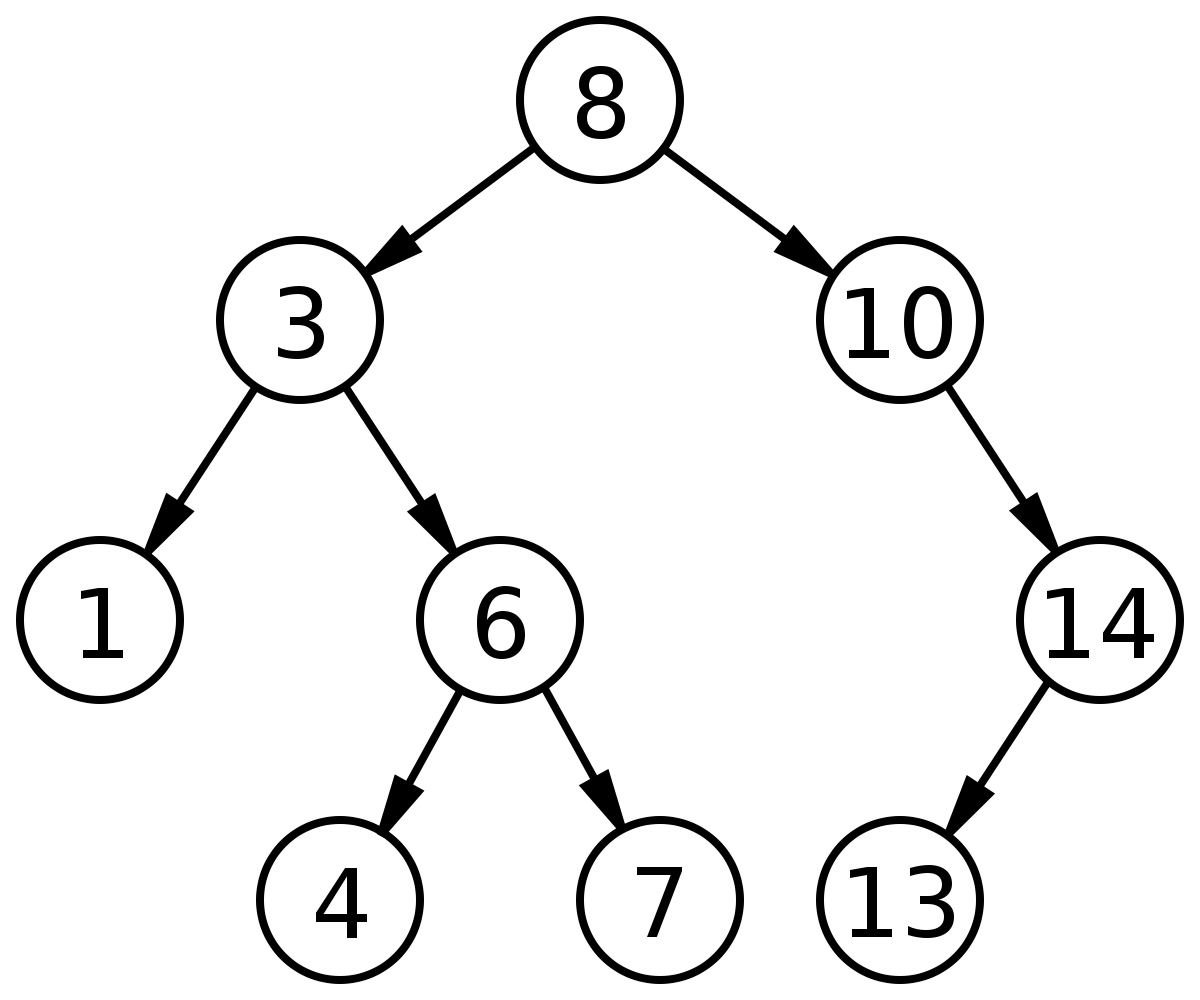

In [10]:
%load_ext tutormagic

In [16]:
#%%tutor --lang python3 -k

class BinaryTree:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data

    def insert(self, data):
        if self.data:
            if data < self.data:
                if self.left is None:
                    self.left = BinaryTree(data)
                else:
                    self.left.insert(data)
            elif data > self.data:
                if self.right is None:
                    self.right = BinaryTree(data)
                else:
                    self.right.insert(data)
        else:
            self.data = data

    def print_tree(self):
        if self.left:
            self.left.print_tree()
        print(self.data)
        if self.right:
            self.right.print_tree()

root = BinaryTree(12)
root.insert(6)
root.insert(14)
root.insert(3)

root.print_tree()

3
6
12
14


### Handling python environments:

For our flask applications, we're using `flask`, `requests`, `flask-sqlalchemy` and other libraries.

If we were to move our code to a new machine, it won't run unless that machine also has those libraries installed. We can use virtual environments to do this.

# venv

Python includes a standard library module that allows us to set up virtual environments.

`python3 -m venv /path/to/new/virtual/environment`

will create a new virtual environment in the path chosen.

If you go into that directory, you'll notice a bin folder. You can activate your virtual environment using that.

`source bin/activate`

Which will activate your venv's python interpreter which means `pip` commands used will install to that version of python and not your system version.

To deactivate your venv:

`deactivate` in the directory your venv is in.

### Notes:

You can get a list of the python libraries installed by running:

`pip freeze requirements.txt` - this will add the list of python libraries installed to `requirements.txt`






# Getting ready for deployment

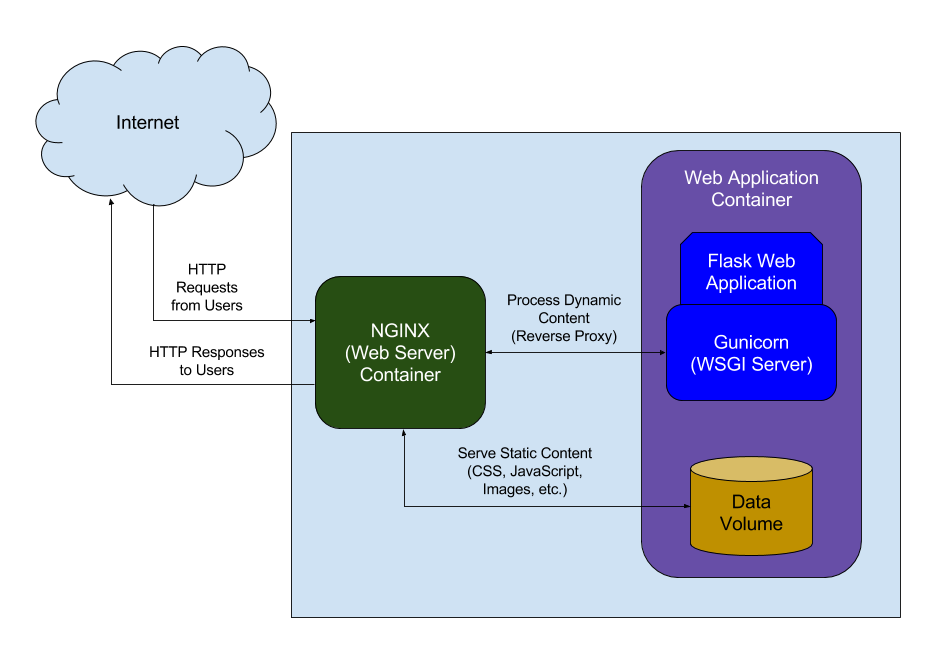

# Notes on python

### GIL

Python is restricted by it's GIL (global interpreter lock) which only allows one thread to access python bytecode or objects at once. Because of this, python isn't able to take advantage of multithreading and using multiple cores available on your machine.

This presents an issue for us deploying a web application. We might have multiple people accessing our web application at once and if the GIL locks resources from being accessed, that could slow down our web app.

To get around this we have to use techniques to work around this. One way is using software like gunicorn. Gunicorn allows us to set up multiple versions of our application, all being handled by different "workers". When a request comes in from out web server, it's sent to one of the workers which is running our flask application.

### WSGI and uWSGI

Before WSGI (web server gateway interface), python applications had no standardized way to communicate with web servers. Flask and more modern python web applications follow WSGI which allow a more uniform binding with web servers. uWSGI is an application server which handles the communications between your web app and the web server in order to follow the WSGI standard (uWSGI will also allow you to set configs for this).


### Deployment process

To run our web application on the internet, we need to deploy to a server. 

Usually this means: 
* setting up a linux (or windows) server, securing it, and moving our project files over to the server. 
* setting up our flask application as a daemon (program that runs in the background). There are two caveats to this: using software like gunicorn to run multiple workers and setting up uwsgi.
* Setting up our database and adding our data to it making sure it connects to our flask application.
* Setting up a web server (apache or nginx) in front of it to handle requests coming into our server. You can think of our web server as the application that faces outward and accepts requests from the internet. 

more on this: https://www.digitalocean.com/community/tutorials/how-to-serve-flask-applications-with-uwsgi-and-nginx-on-ubuntu-20-04

### What this means for us?

For simple web applications, there are SaaS providers that handle this server set up for us and allows us to only focus on our flask application. 

We have two options for deployment:

pythonanywhere: https://www.pythonanywhere.com/

heroku: https://www.heroku.com/

### Homework for tonight: sign up for either of the two so we can try deploying tomorrow.

# Week 11 Lab 1


### Exercise (no submission required)

Work on your project. Set up a model (table) in flask-sqlalchemy that will contain your data. Connect it to your `import_script.py` file so that when you run the script, your data is stored in the database.